In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#get stock market data
stock = 'MSFT' 
data = yf.download(stock, start='2012-01-01', end='2020-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2012-01-03,21.120092,21.269991,20.820292,20.946523,64731500
2012-01-04,21.617130,21.672356,21.127984,21.159541,80516100
2012-01-05,21.838034,21.877480,21.530345,21.601349,56081400
2012-01-06,22.177279,22.240394,21.719690,21.719690,99455500
2012-01-09,21.885378,22.169399,21.869599,22.129951,59706800
...,...,...,...,...,...
2019-12-24,150.531708,150.847350,150.283012,150.627348,8989200
2019-12-26,151.765564,151.822951,150.550823,150.703864,14520600


In [7]:
#output index instead of date
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2012-01-03,21.120092,21.269991,20.820292,20.946523,64731500
1,2012-01-04,21.617130,21.672356,21.127984,21.159541,80516100
2,2012-01-05,21.838034,21.877480,21.530345,21.601349,56081400
3,2012-01-06,22.177279,22.240394,21.719690,21.719690,99455500
4,2012-01-09,21.885378,22.169399,21.869599,22.129951,59706800
...,...,...,...,...,...,...
2007,2019-12-24,150.531708,150.847350,150.283012,150.627348,8989200
2008,2019-12-26,151.765564,151.822951,150.550823,150.703864,14520600
2009,2019-12-27,152.042953,152.607276,151.335149,152.511622,18412800


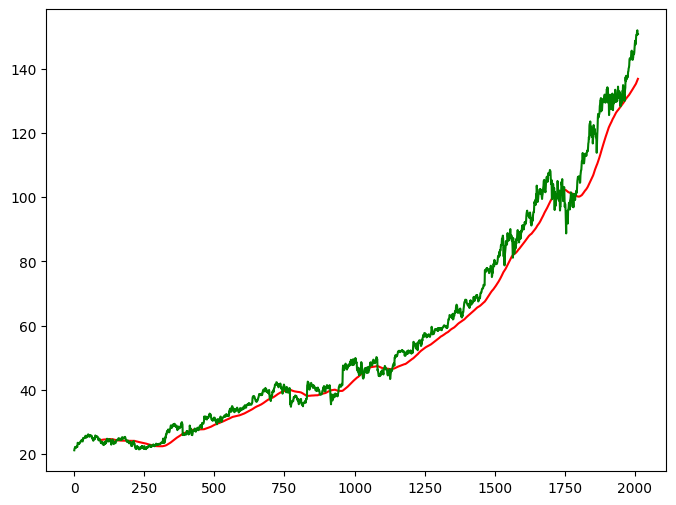

In [9]:
# calculate moving average of 100 day 
ma_100_days = data.Close.rolling(100).mean()
close_data = data.Close
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, color='red')
plt.plot(close_data, color='green')
plt.show()

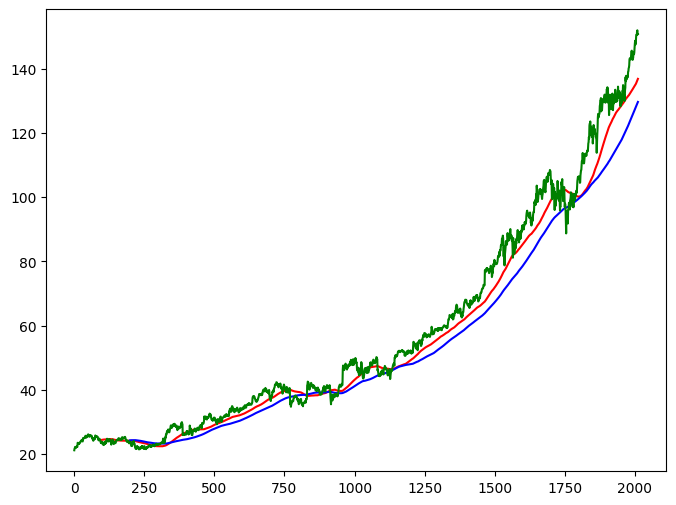

In [11]:
ma_200_days = data.Close.rolling(200).mean()
close_data = data.Close
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, color='red')
plt.plot(ma_200_days, color='blue')
plt.plot(close_data, color='green')
plt.show()

In [13]:
data.dropna(inplace=True) # clean up , remove NULL data sets

#80% of data will be train data set, remaining 20% will be test data set
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [15]:
data_train.shape[0]  # how many rows the train data is

1609

In [17]:
data_test.shape[0] # how many rows are test data set

403

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_train_scale = scaler.fit_transform(data_train) # fits data between 0 and 1

In [21]:
# take first 100 days data to calculate the data, higher the data higher the accuracy
#array slicing
x = []
t = []
for i in range (100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100: i])
    t.append(data_train_scale[i,0])

In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input  # works as independant layer
from tensorflow.keras.models import Sequential  # neuroal network, used to predict data based off time series

In [24]:
#creating the model
# convert data from above into 2 arrays
# output of one layer will become input of another layer
x, t = np.array(x), np.array(t)
model = Sequential([
    Input(shape=(x.shape[1], 1)),  # Define input shape explicitly
    LSTM(units=50, activation='relu', return_sequences=True) # return seq is output of one layer will become input of another
])
model.add(Dropout(0.2)) # 20% of data will fit the mean values
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True)) # creates 4 LSTM for Seq. Units = Neural networks
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True)) # relu is a Neural network parameter that is passed calc network
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu')) # final layer so no need to return_sequence
model.add(Dropout(0.5))
model.add(Dense(units = 1))  # going to predict one value, Closing value of stock

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  # when there is a loss go with mean_squared_error
model.fit(x, t, epochs = 50, batch_size = 32, verbose = 1) 

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - loss: 0.0613
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - loss: 0.0083
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - loss: 0.0052
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - loss: 0.0049
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - loss: 0.0079
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - loss: 0.0048
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - loss: 0.0046
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - loss: 0.0042
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 0.0044
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - loss: 0.0039
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - loss: 0.0042
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - loss: 0.0037
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 0.0036
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - loss: 0.0053
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [43]:
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test], ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

In [53]:
# array slicing with testing data
x = []
t = []
for i in range (100, data_test_scale.shape[0]):
    x.append(data_test_scale[i - 100: i])
    t.append(data_test_scale[i,0])
x, t = np.array(x), np.array(t)

In [55]:
y_pred = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step


In [57]:
y_pred

array([[0.16418462],
       [0.16576217],
       [0.1669647 ],
       [0.16759536],
       [0.16743794],
       [0.16642465],
       [0.16456966],
       [0.16188459],
       [0.15838481],
       [0.15410867],
       [0.14912432],
       [0.14355242],
       [0.13755286],
       [0.13130698],
       [0.12502897],
       [0.11893741],
       [0.11322992],
       [0.10808714],
       [0.10368308],
       [0.10013781],
       [0.09748909],
       [0.09574617],
       [0.09490555],
       [0.09492761],
       [0.09571557],
       [0.09713595],
       [0.09899942],
       [0.10108714],
       [0.10317947],
       [0.10507955],
       [0.10663173],
       [0.1077413 ],
       [0.1083879 ],
       [0.10860963],
       [0.10849912],
       [0.10816229],
       [0.10770614],
       [0.10725709],
       [0.10694766],
       [0.10689136],
       [0.10717028],
       [0.107823  ],
       [0.10885055],
       [0.11022901],
       [0.11192138],
       [0.11388938],
       [0.11608297],
       [0.118

In [65]:
scale = 1 / scaler.scale_ # fits into 0 and 1

In [67]:
y_pred = y_pred * scale # predicted values

In [69]:
t = t * scale # actual values

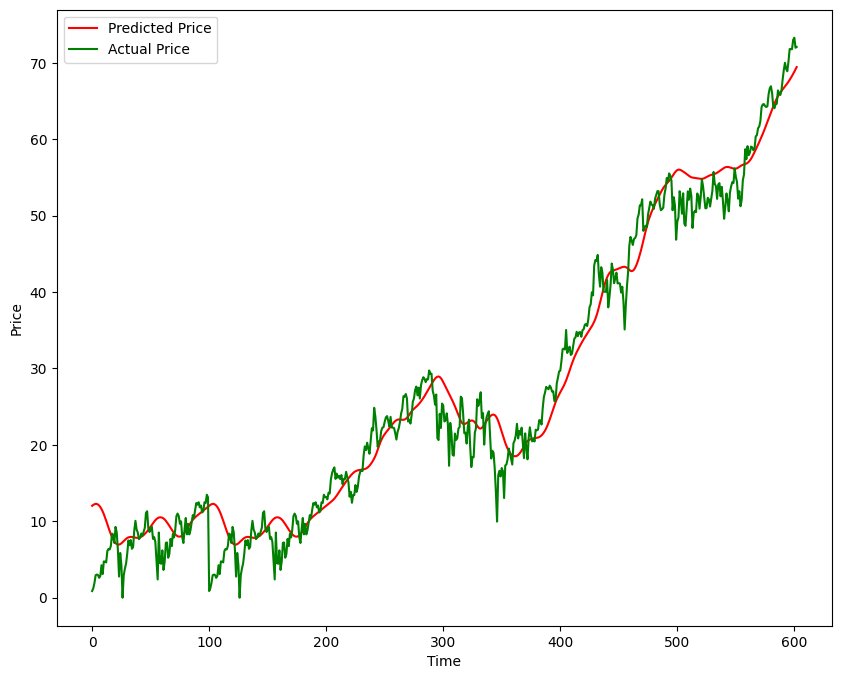

In [71]:
plt.figure(figsize=(10, 8))
plt.plot(y_pred, 'r', label='Predicted Price')
plt.plot(t, 'g', label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [73]:
model.save('Stock Predictions Model.keras')